In [1]:
# using the kvelo environment

### load libraries

# standard libraries
import numpy as np

# single-cell libraries
import anndata as ad

# plotting libraries
import matplotlib.pyplot as plt

# import our own functions
import velocity

In [2]:
### set arguments for plotting
kwargs = {"n_cols":4, 'figsize':(20,8)}

In [3]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

100%|██████████| 50.0M/50.0M [00:00<00:00, 70.9MB/s]


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
### 1. convert matrices from sparse to dense
print("Converting matrices to dense.")
adata.X = adata.X.todense()
adata.layers['spliced'] = adata.layers['spliced'].todense()
adata.layers['unspliced'] = adata.layers['unspliced'].todense()


Converting matrices to dense.


In [5]:
### 2. select HVGs
hvgs = velocity.pp.filtering.get_hvgs(adata, no_of_hvgs=5000, theta=100, layer='spliced')
print("Subsetting to top 5000 highly-variable genes.")
adata = adata[:, hvgs]


Subsetting to top 5000 highly-variable genes.


In [6]:
### 3. subset for genes that have high enough U and S counts
minlim = 4
us_genes = velocity.pp.filtering.get_high_us_genes(adata, minlim_u=minlim, minlim_s=minlim)
print("Subsetting to " + str(len(us_genes)) + " genes with sufficient S and U counts.")
adata = adata[:,us_genes]


Subsetting to 406 genes with sufficient S and U counts.


In [7]:
### 4. L1 normalise unspliced and spliced together
print("Normalising counts.")
velocity.pp.normalisation.normalise_layers(adata, mode='combined', norm='L1')


Normalising counts.
total_counts not given


In [8]:
### 5. imputation
print("Imputing counts.")
velocity.pp.imputation.impute_counts(adata, n_neighbours = 30, layer_NN = 'spliced', n_pcs = 15)

Imputing counts.


In [9]:
adata

AnnData object with n_obs × n_vars = 3696 × 406
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [10]:
### select genes of interest
test_genes = ["Abcc8", "Cpe", "Rap1gap2", "Gcg", "Gng12", "Adk","Gnao1", "Nnat"]

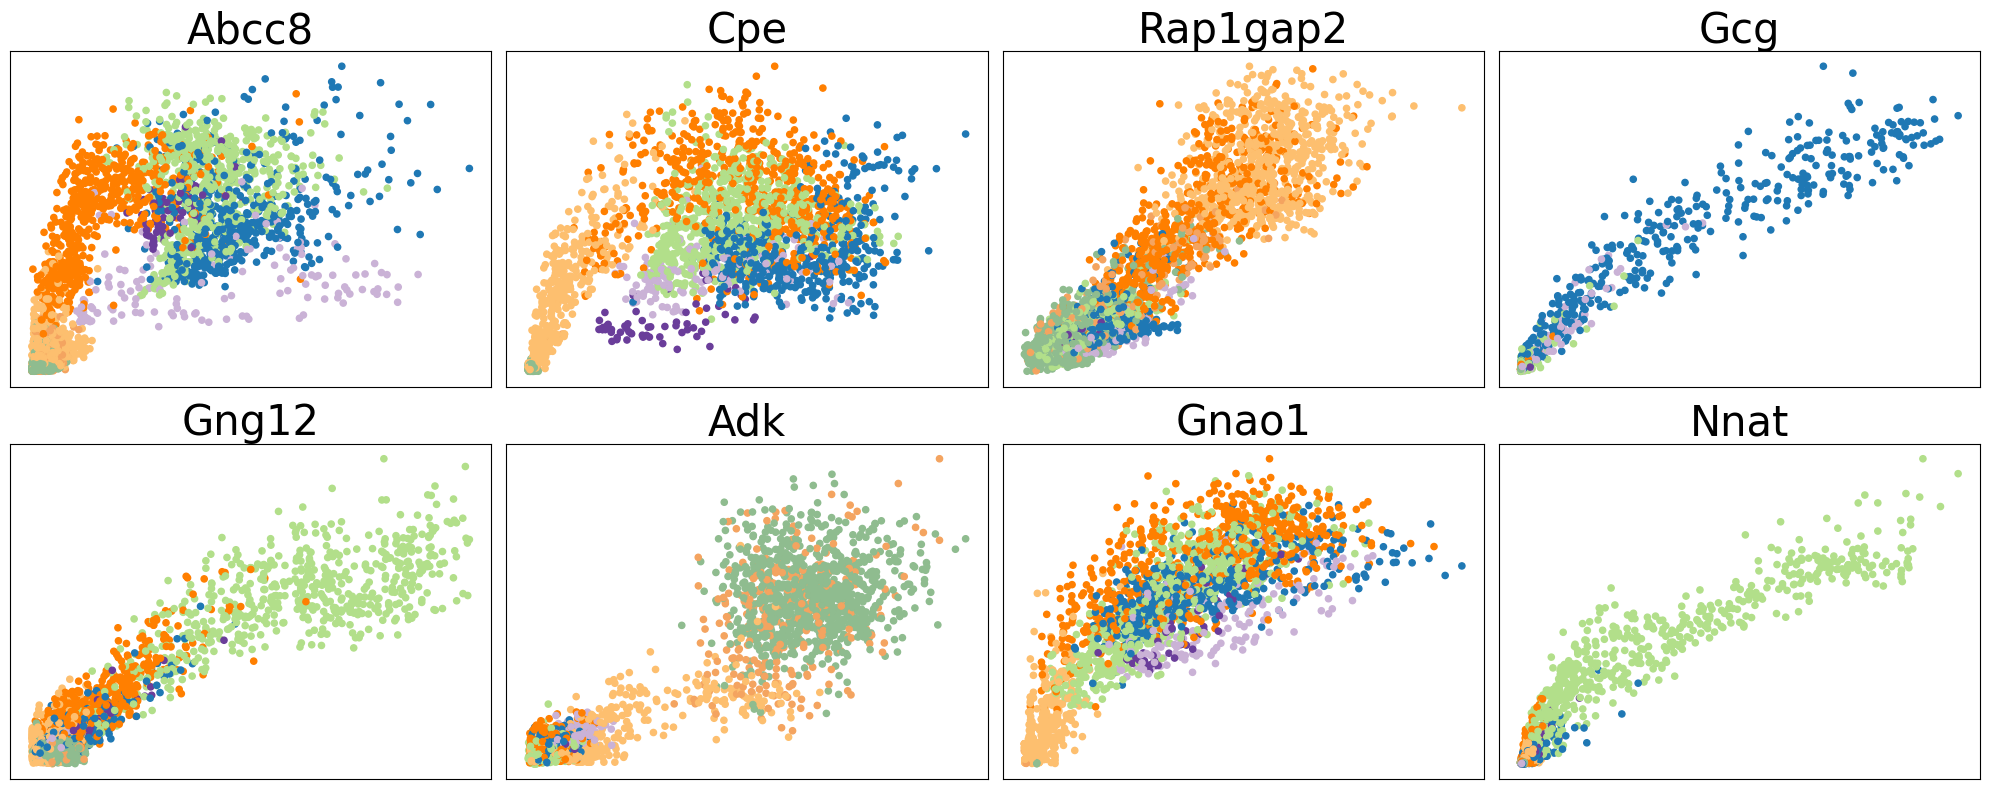

In [11]:
velocity.pl.kinetics.scatter(adata, test_genes, **kwargs)

In [12]:
### recover dynamics for all genes
velocity.tl.fit.recover_reaction_rate_pars(adata, use_raw=False)

Optimization terminated successfully.
         Current function value: 16.381303
         Iterations: 387
         Function evaluations: 669
Optimization terminated successfully.
         Current function value: 21.099765
         Iterations: 486
         Function evaluations: 855
Optimization terminated successfully.
         Current function value: 19.698279
         Iterations: 273
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 21.180111
         Iterations: 296
         Function evaluations: 506
Optimization terminated successfully.
         Current function value: 26.402465
         Iterations: 284
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 16.939479
         Iterations: 614
         Function evaluations: 1050
Optimization terminated successfully.
         Current function value: 12.265395
         Iterations: 481
         Function evaluations: 860
Optimization

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (406, 7) + inhomogeneous part.

In [15]:
x = [[1, 2], [2, 3, 4]]
np.array(x, dtype=np.float64)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [14]:
### recover dynamics for all genes
velocity.tl.fit.recover_reaction_rate_pars(adata, parallel=False, use_raw=False)

Optimization terminated successfully.
         Current function value: 13.641889
         Iterations: 312
         Function evaluations: 545
Optimization terminated successfully.
         Current function value: 33.517168
         Iterations: 269
         Function evaluations: 461
Optimization terminated successfully.
         Current function value: 13.834628
         Iterations: 648
         Function evaluations: 1165
Optimization terminated successfully.
         Current function value: 16.582300
         Iterations: 343
         Function evaluations: 590
Optimization terminated successfully.
         Current function value: 11.457448
         Iterations: 459
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 13.258817
         Iterations: 404
         Function evaluations: 714
Optimization terminated successfully.
         Current function value: 28.761260
         Iterations: 326
         Function evaluations: 570
Optimization

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

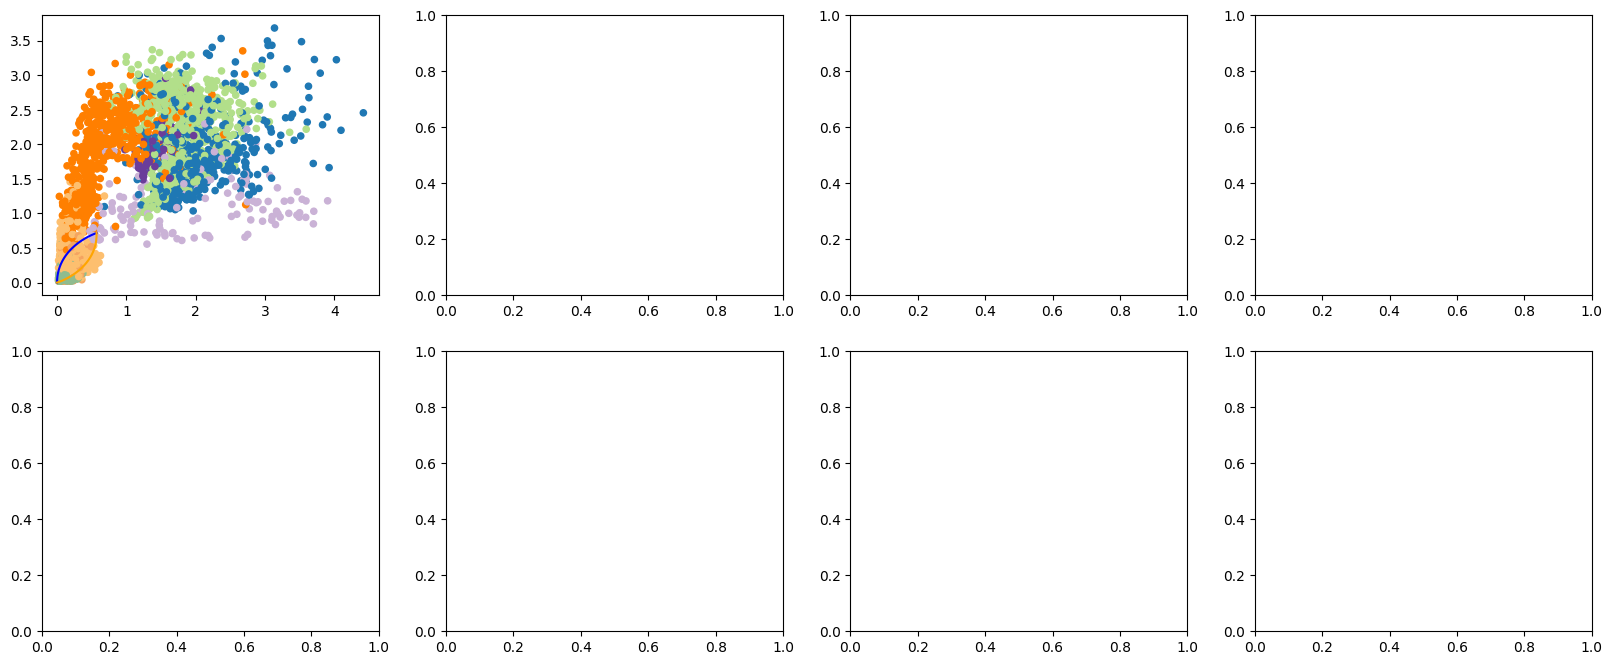

In [28]:
### plot genes of interest after recovering parameters
velocity.pl.kinetics.scatter(adata, test_genes, **kwargs)

In [17]:
adata

AnnData object with n_obs × n_vars = 3696 × 406
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_U_switch', 'fit_likelihood', 'fit_scaling'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_Pi'
    obsp: 'distances', 'connectivities'

In [20]:
print(adata.var['fit_alpha'])
print(adata.var['fit_beta'])
print(adata.var['fit_gamma'])
print(adata.var['fit_U_switch'])
print(adata.var['fit_scaling'])

index
Pyy       0.009375
Gcg       0.044218
Iapp      0.008905
Ghrl      0.024841
Ins2      0.011630
            ...   
Nipbl     0.001947
Cmtm4     0.000906
Rabep1    0.001619
Chd6      0.003259
Anp32e    0.004409
Name: fit_alpha, Length: 406, dtype: float64
index
Pyy       0.009309
Gcg       0.041336
Iapp      0.007123
Ghrl      0.024030
Ins2      0.008767
            ...   
Nipbl     0.002020
Cmtm4     0.001222
Rabep1    0.001809
Chd6      0.003606
Anp32e    0.003281
Name: fit_beta, Length: 406, dtype: float64
index
Pyy       0.012873
Gcg       0.047301
Iapp      0.011083
Ghrl      0.022384
Ins2      0.008301
            ...   
Nipbl     0.002817
Cmtm4     0.001443
Rabep1    0.002702
Chd6      0.004991
Anp32e    0.005415
Name: fit_gamma, Length: 406, dtype: float64
index
Pyy       0.997021
Gcg       1.059023
Iapp      1.237645
Ghrl      1.023410
Ins2      1.313397
            ...   
Nipbl     0.954319
Cmtm4     0.733614
Rabep1    0.886293
Chd6      0.894757
Anp32e    1.330382
Name: 

In [30]:
print(adata.layers["fit_Pi"].shape)
print(adata.layers["Mu"].shape)
print(adata.layers["Ms"].shape)

(3696, 406)
(3696, 406)
(3696, 406)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

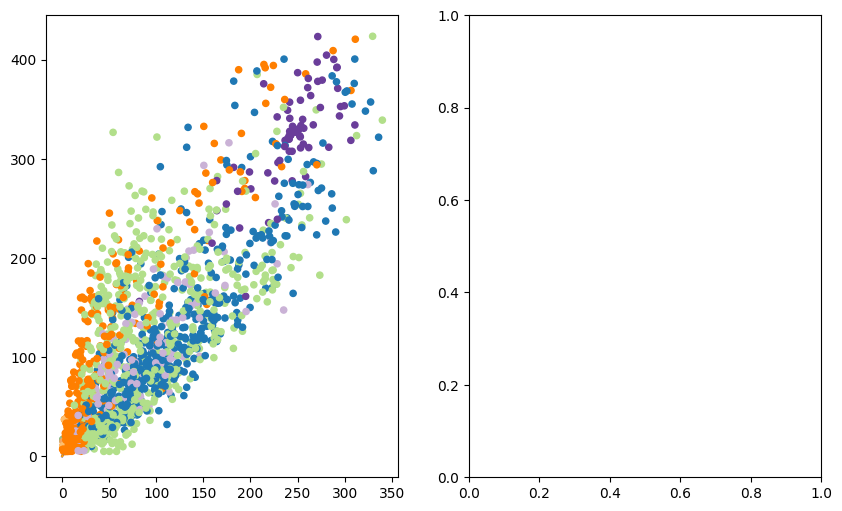

In [32]:
velocity.pl.kinetics.scatter(adata, ["Pyy","Gcg"])